<a href="https://colab.research.google.com/github/Hepheir/smu-HAEM0018-Multimedia-Signal-Processing/blob/master/OpenCVFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 멀티미디어신호처리 (HAEM0018)

영상처리 핵심 알고리즘 Review (3)

7주차 강의 실습

## 의존성 관리

In [ ]:
from google.colab import files
from google.colab.patches import cv2_imshow

import cv2
import matplotlib.pyplot as plt
import numpy as np

Saving Mona Lisa Original.png to Mona Lisa Original (2).png


## 실습에 사용할 이미지 업로드

In [ ]:
uploaded = files.upload()

image = cv2.imread(next(iter(uploaded.keys())))

## Mean Bluring (Mean Blurring)

크기가 4인 필터를 이용한다.

[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]


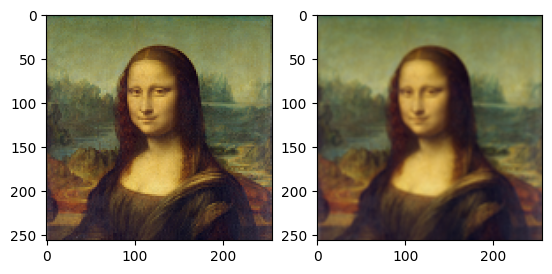

In [ ]:
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

size = 4
kernel = np.ones((size, size), np.float32) / (size ** 2)
print(kernel)

dst = cv2.filter2D(image, -1, kernel)
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

plt.show()

## Basic Bluring + Gaussian Blurring

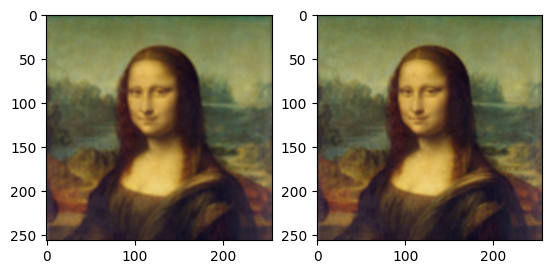

In [ ]:
# Basic Blurring

dst = cv2.blur(image, (4,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


# Gaussian Blurring

dst = cv2.GaussianBlur(image, (5,5), 0)
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

plt.show()

## 샤프닝 코드
Sharpening 회선 처리

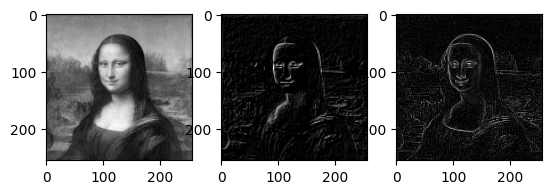

In [ ]:
# Sharpening

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mask1 = np.array([
    [-1,0,0],
    [0,0,0],
    [0,0,1],
])
mask2 = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1],
])

out1 = cv2.filter2D(gray, -1, mask1)
out2 = cv2.filter2D(gray, -1, mask2)

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(out1, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(out2, cmap='gray')
plt.show()

## 기하학적 변환의 개요

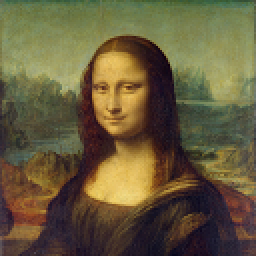

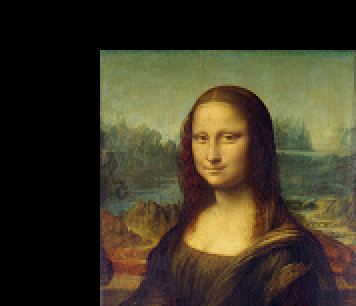

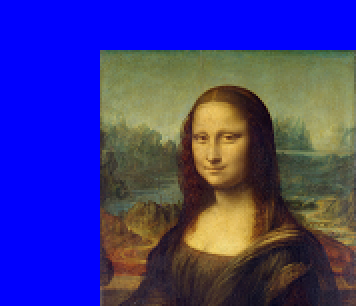

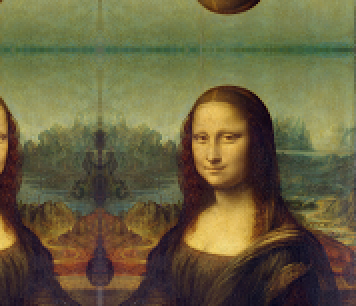

In [ ]:
# 기하학적 변환

rows, cols = image.shape[:2]

dx, dy = 100, 50

mtrx = np.float32([
    [1, 0, dx],
    [0, 1, dy],
])
dst = cv2.warpAffine(image, mtrx, (cols+dx, rows+dy))

dst2 = cv2.warpAffine(image, mtrx, (cols+dx, rows+dy), None, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0))

dst3 = cv2.warpAffine(image, mtrx, (cols+dx, rows+dy), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

cv2_imshow(image)
cv2_imshow(dst)
cv2_imshow(dst2)
cv2_imshow(dst3)

## 이미지 회전

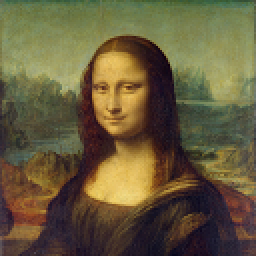

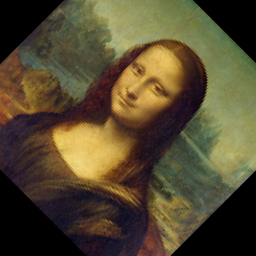

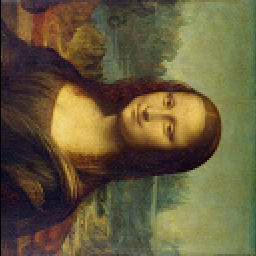

In [ ]:
# 이미지 회전

d45 = 45.0 * np.pi / 180
d90 = 90.0 * np.pi / 180

m45 = np.float32([
    [np.cos(d45), -1 * np.sin(d45), rows//2],
    [np.sin(d45), np.cos(d45), -1 * cols//4],
])
m90 = np.float32([
    [np.cos(d90), -1 * np.sin(d90), rows],
    [np.sin(d90), np.cos(d90), 0],
])

r45 = cv2.warpAffine(image, m45, (cols,rows))
r90 = cv2.warpAffine(image, m90, (cols,rows))

cv2_imshow(image)
cv2_imshow(r45)
cv2_imshow(r90)

## 이미지 회전 - 회전축 중심 변환

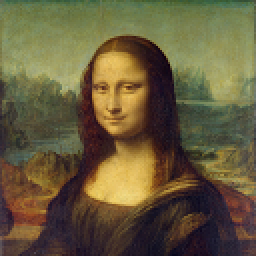

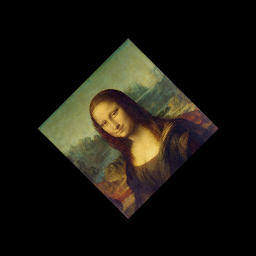

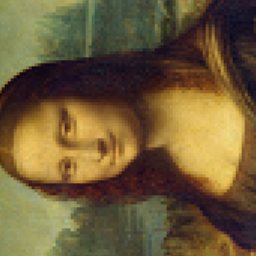

In [ ]:
m45 = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 0.5)
m90 = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1.5)

img45 = cv2.warpAffine(image, m45, (cols, rows))
img90 = cv2.warpAffine(image, m90, (cols, rows))

cv2_imshow(image)
cv2_imshow(img45)
cv2_imshow(img90)

## 영상 확대 및 축소

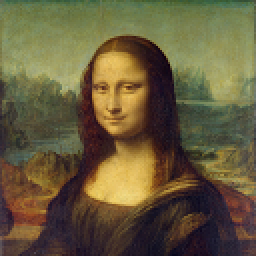

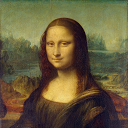

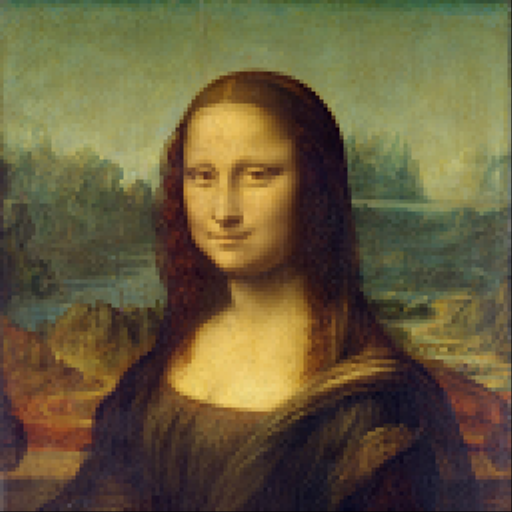

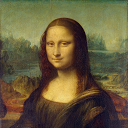

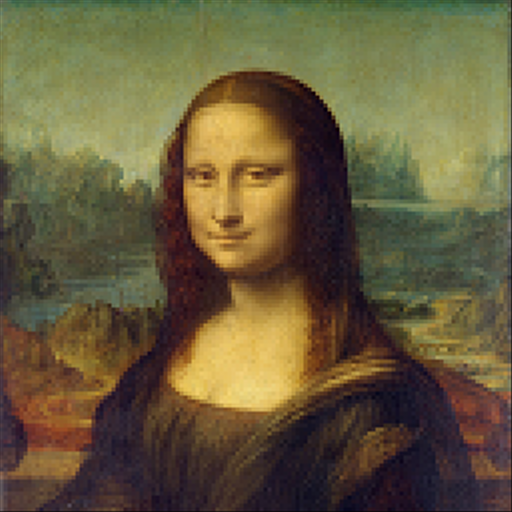

In [ ]:
height, width = image.shape[:2]

m_small = np.float32([
    [0.5, 0, 0],
    [0, 0.5, 0],
])
m_big = np.float32([
    [2, 0, 0],
    [0, 2, 0],
])

dst1 = cv2.warpAffine(image, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(image, m_big, (int(height*2), int(width*2)))


dst3 = cv2.warpAffine(image, m_small, (int(height*0.5), int(width*0.5)), None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(image, m_big, (int(height*2), int(width*2)), None, cv2.INTER_CUBIC)

cv2_imshow(image)
cv2_imshow(dst1)
cv2_imshow(dst2)
cv2_imshow(dst3)
cv2_imshow(dst4)